## Ch1. Clustering for Datasets Exploration
- **Algorithms**: sklearn.cluster.KMeans
- **Helpers**: StandardScaler, Normalizer, Pipeline

KMeans needs Feature scaling <br>
&emsp; StandardScaler -> maps all features from 0 to 1 <br>
&emsp; Normalizer -> maps each feature independently 



## Ch2. Visualization with hierarchical clustering and t-SNE
- **Algorithms**: scipy.cluster.hierarchy.linkage | fcluster 
- **Helpers**: scipy.cluster.hierarchy.dendrogram, sklearn.manifold.TSNE, normalize

hierarchy.linkage  needs Feature scaling <br>

dendrogram <br>
&emsp; tree-based visualization, reads from bottom to up<br>
&emsp; the height represents the distance between merging 2 clusters <br>
&emsp; &emsp; - *complete*: max distance between the samples <br>
&emsp; &emsp; - *single*: min distance between the samples <br>

fcluster -> cuts the hierarchical cluster at specific height

TSNE -> visualize higher dimensional datasets in 2D/3D scale
&emsp;-> learning_rate: hyperparameter differs from 50 to 200


## Ch3. Decorrelating your data and dimension reduction

- **Algorithms**: PCA
- **Helpers**: 

dimension reduction -> remove less-informative 'noisy' features<br>

PCA: Principal component analysis <br>
&emsp; step 1: decorrelation <br>
&emsp;&emsp; 1. shifts the data to be alligened with the axes<br>
&emsp;&emsp; 2. shifts the data to have a mean 0<br>
&emsp; step 2: reduce dimentionality  <br>
&emsp;&emsp; by keeping PCA features that has high variance  <br>
Intrinsic dimenion = the number of PCA features with high variance<br>

sklearn.decomposition.PCA don't support spare dataset 'vocabulary vs documents'<br>

with spare dataset, sklearn.decomposition.TruncatedSVD are used



## Ch4. Discovering interpretable features

- **Algorithms**: 
- **Helpers**: 

NMF: Non-negative Matrix Factorization = a interpretable dimension reduction technique <br>
&emsp; all features must be non negative <br>
&emsp; works fine with both dense and sparse datasets <br>
&emsp; n_components must always be specified <br>
&emsp; multiplying NMF components with NMF feature value and then adding up = reconstruction <br>


#### import libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib notebook
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, NMF

## Iris Dataset
- **Algorithms**: KMeans for semi-supervised
- **Visualization**: <br>
&emsp; plot1: Sepal Length/Width of real labels <br>
&emsp; plot2: TSNE plot of real labels<br>
&emsp; plot3: Sepal Length/Width of predicted labels<br>
&emsp; plot4: TSNE plot of predicted labels<br>
- **Evaluation**: crosstab, inertia


<IPython.core.display.Javascript object>


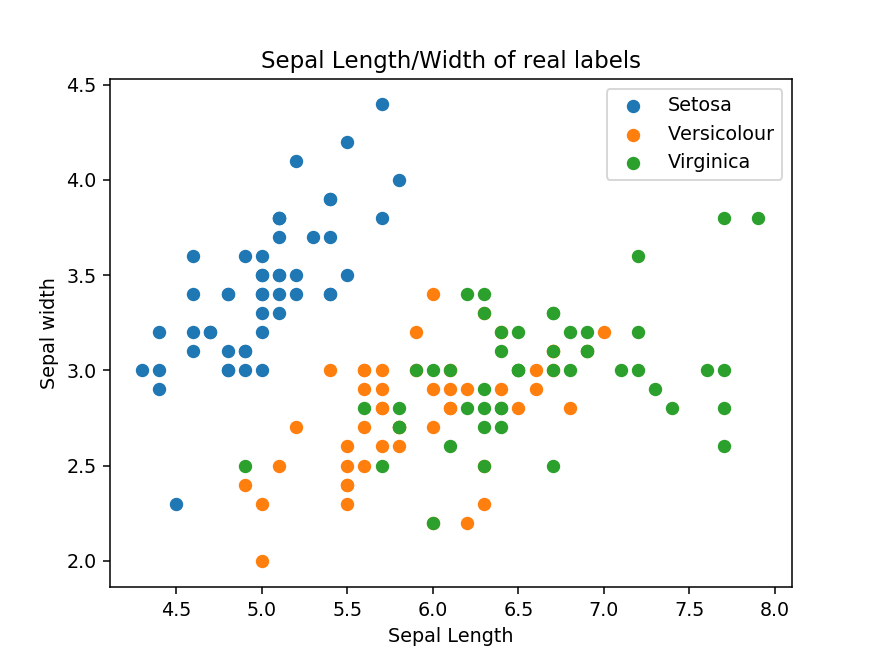

<IPython.core.display.Javascript object>


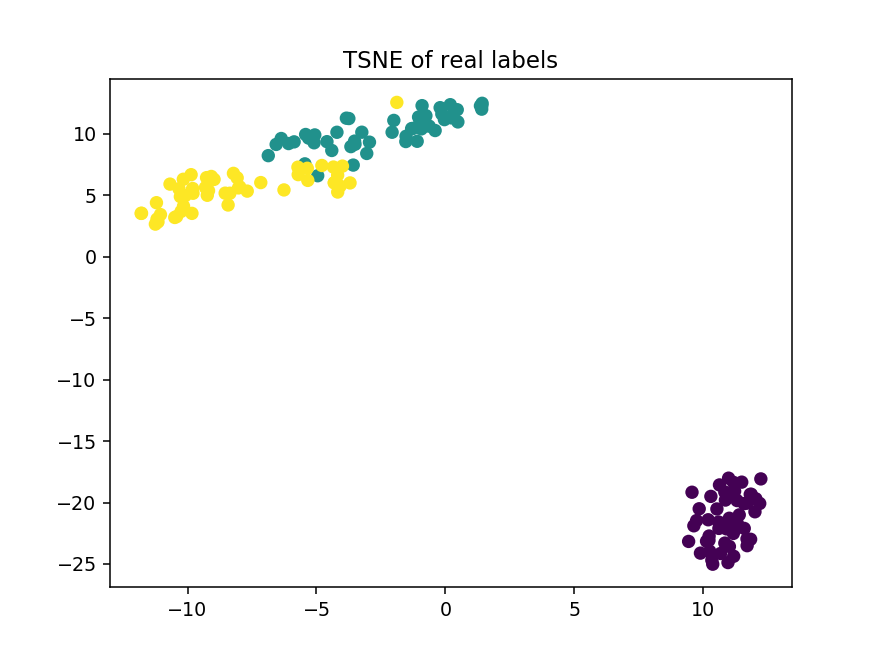

Text(0.5, 1.0, 'TSNE of real labels')

In [2]:
# load data
iris = datasets.load_iris()
X = iris.data[:, :]  
y = iris.target

# real dataframe
data = pd.DataFrame(X, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
data['target']=  pd.Series(y)
data.target.replace({0:'Setosa',1: 'Versicolour', 2: 'Virginica'}, inplace = True)

#Visualizing the real labels
groups = data.groupby("target")
for name, group in groups:
    plt.scatter(group['sepal_length'], group['sepal_width'], marker="o", label=name)

plt.xlabel('Sepal Length'); plt.ylabel('Sepal width')
plt.gca().set_title('Sepal Length/Width of real labels')
plt.legend()

# TSNE visualization of the real labels
tsne = TSNE(learning_rate = 100)
new_iris = tsne.fit_transform(X)

Fig, ax = plt.subplots()
plt.scatter(new_iris[:, 0], new_iris[:, 1], c = y)
plt.gca().set_title('TSNE of real labels')



<IPython.core.display.Javascript object>


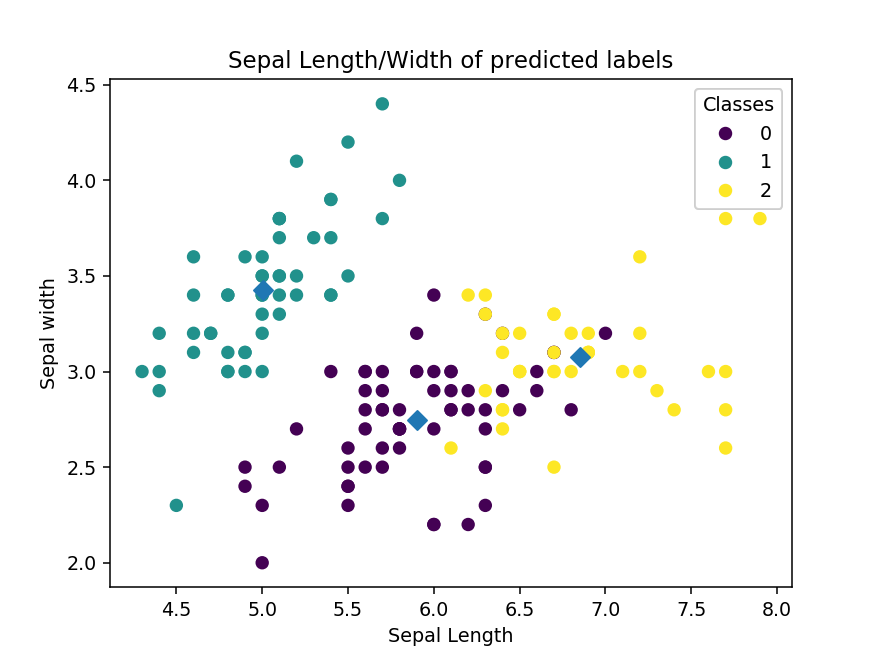

<IPython.core.display.Javascript object>


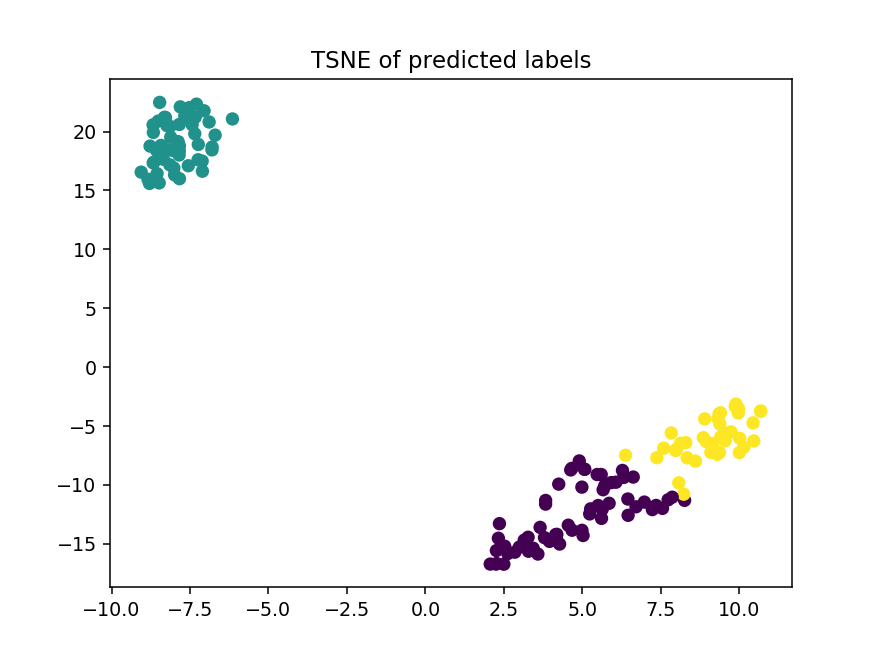

Text(0.5, 1.0, 'TSNE of predicted labels')

In [3]:
#predicted labels
Kmeans = KMeans(n_clusters = 3).fit(X)
predict = Kmeans.predict(X)

#geting the centroids 
centroids = Kmeans.cluster_centers_

#Visualizing the predicted labels
fig2, ax2 = plt.subplots()
scatter2 = ax2.scatter(data.sepal_length, data.sepal_width, c= predict)
ax2.scatter(centroids[:, 0], centroids[:, 1], s= 50, marker = 'D')
plt.xlabel('Sepal Length'); plt.ylabel('Sepal width')
ax2.set_title('Sepal Length/Width of predicted labels')
legend2 = ax2.legend(*scatter2.legend_elements(),
                    loc=1, title="Classes")
ax2.add_artist(legend2)

# TSNE visualization of the predicted values
tsne = TSNE(learning_rate = 100)
new_iris = tsne.fit_transform(X)
Fig, ax = plt.subplots()
plt.scatter(new_iris[:, 0], new_iris[:, 1], c = predict)
plt.gca().set_title('TSNE of predicted labels')



In [4]:
#compare the real with predicted labels
compare = pd.DataFrame({'real' : data.target, 'predicted': predict})
cross_table = pd.crosstab(compare['predicted'], compare['real'])
cross_table


real,Setosa,Versicolour,Virginica
predicted,,,
0,0,48,14
1,50,0,0
2,0,2,36


In [5]:
print(Kmeans.inertia_)

78.85144142614601


### Wine Dataset
- **Algorithms**: KMeans for semi-supervised, StandardScaler for scaling  
- **Evaluation**: inertia


In [6]:
wine = datasets.load_wine()
X = wine.data[:,:]
y = wine.target

wine_df = pd.DataFrame(X)
wine_df['target'] = y
wine_df.head()
# as you see, there are variance between the cols 
# KMeans is affected by that variance 

# KMeans without standarization
model = KMeans(n_clusters = 3)
wine_predict = model.fit_predict(X)
print("before standarization inertia: ", model.inertia_)
print("    Very Very large ==> very very bad model")

### Standarization and clustering using pipeline
# first create objects
scaler = StandardScaler()
model2 = KMeans(n_clusters = 3)
# second make_pipeline
pipeline = make_pipeline(scaler, model2)
pipeline.fit(X) # fits both scaler and model2
new_predict = pipeline.predict(X)

print("after standarization inertia: ", model2.inertia_)
print("\nthe difference: ", model.inertia_ - model2.inertia_)



before standarization inertia:  2370689.686782968
    Very Very large ==> very very bad model
after standarization inertia:  1277.928488844642

the difference:  2369411.7582941237


### Company Stock Price Movements Dataset
- **Algorithms**: linkage (hierarchical clustering), Normalizer for scaling, PCA for dimension Reduction
- **Visualization**: <br>
&emsp; plot1: dendrogram <br>
&emsp; plot2: TSNE <br>

<IPython.core.display.Javascript object>


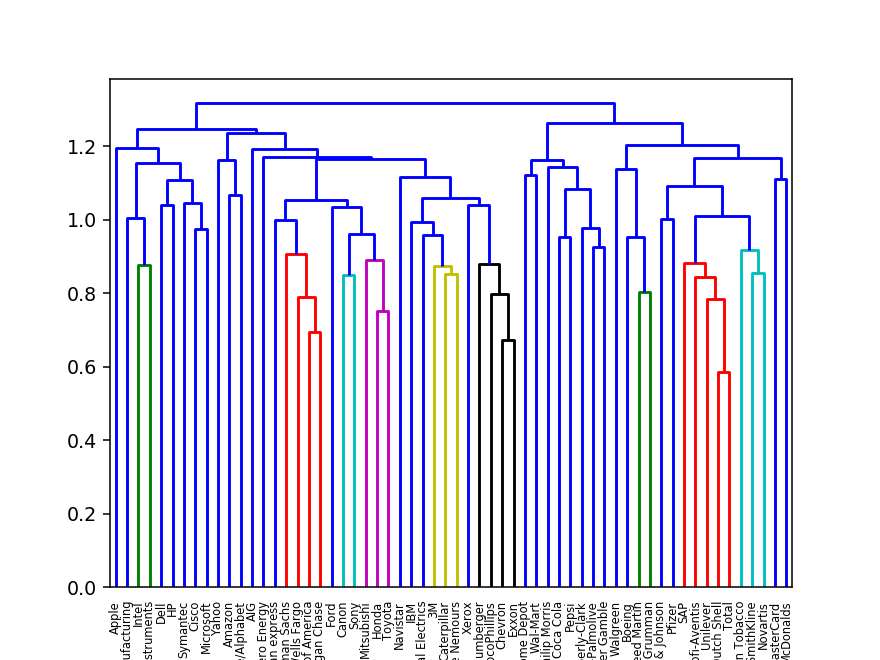

In [7]:
company = pd.read_csv("https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv")

company_name = company['Unnamed: 0']
company = company.drop('Unnamed: 0', axis = 1)
company.head()

# there are variance, so we need to scale
norm = Normalizer().fit(company)
normalized_company = norm.transform(company)

fig3, ax3 = plt.subplots()
hierarchy_model = linkage(normalized_company, method = 'complete')
dendrogram(hierarchy_model, labels = (company_name.tolist()), leaf_rotation=90, leaf_font_size=6)
plt.show()

In [8]:
predicted = fcluster(hierarchy_model, 1, criterion = 'distance')

common_companies = pd.DataFrame({'company_name': company_name, 'predict': predicted}).sort_values('predict')
common_companies.head(10)


,company_name,predict
51,Texas instruments,1
24,Intel,1
50,Taiwan Semiconductor Manufacturing,2
14,Dell,3
22,HP,4
33,Microsoft,5
11,Cisco,5
47,Symantec,6
0,Apple,7
2,Amazon,8


<IPython.core.display.Javascript object>


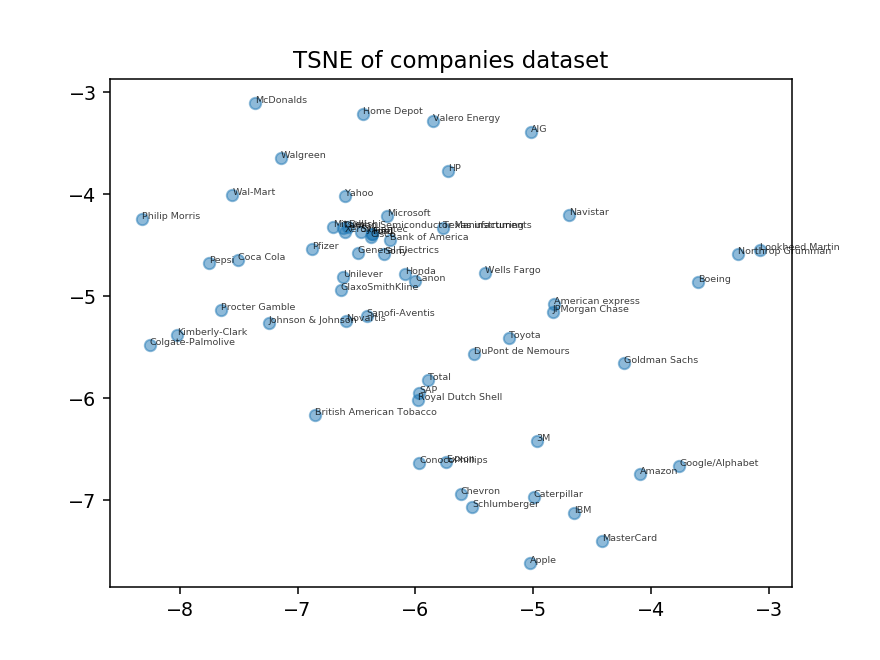

Text(0.5, 1.0, 'TSNE of companies dataset')

In [9]:
# TSNE visualization to extract common features 
tsne = TSNE(learning_rate = 50)
new_companies = tsne.fit_transform(company)

fig3, ax3 = plt.subplots()
plt.scatter(new_companies[:, 0], new_companies[:, 1], alpha = 0.5)
for d, company in zip(new_companies, company_name):
    plt.annotate(company, (d[0], d[1]), fontsize=5, alpha=0.75)
plt.gca().set_title('TSNE of companies dataset')


<IPython.core.display.Javascript object>


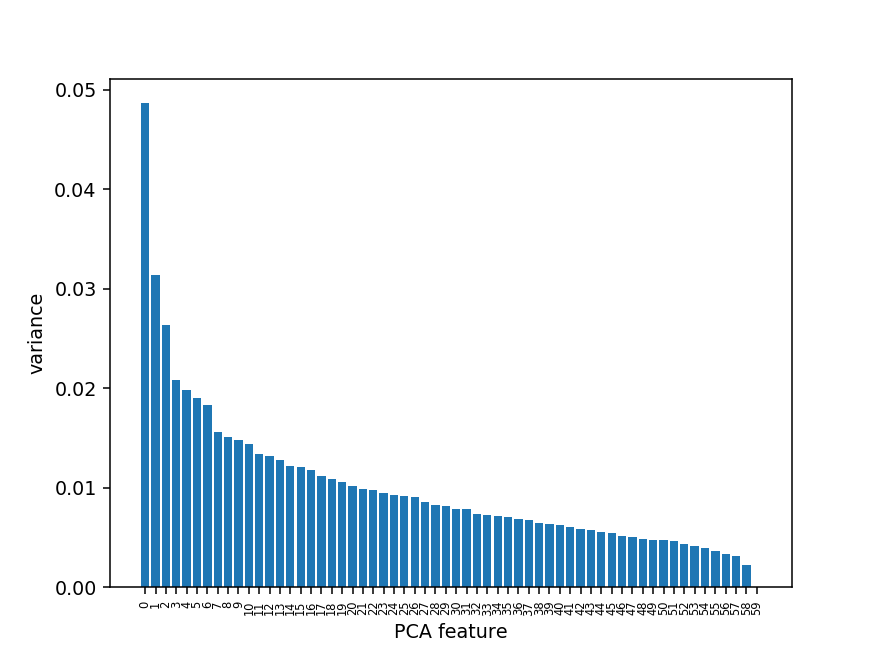

In [10]:
pca = PCA()
pca.fit(normalized_company)


# Plot the explained variances
fig7, ax7 = plt.subplots()
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features, rotation = 90)
plt.setp(plt.gca().get_xticklabels(), fontsize=6)
plt.show()


In [11]:
# cut some features off
pca2 = PCA(n_components = 6)
pca2.fit(normalized_company)
pca_company = pca2.transform(normalized_company)
pca_company.shape

(60, 6)